# Project Submission:

**Step 1 - Data Exploration and Preprocessing:**

Please, book a time for your group to present your first Assignment on Tuesday 08.10 2024 (week 41). The 10-minute time slots will be published later in the course itsLearning's Overview. In Week 41, please submit your documented Jupyter Notebook or a link to its version control repository into the itsLearning return box no later than  Monday 07.10.2024 at 8 a.m.. You will present your assignment related to data exploration and preprocessing during this evaluation event.


In [ ]:
## Enter your full name ##
names = 'Víctor Blanco Bataller, Pawan Aryal'
grade = 0

# **Assignment 1**

# Step 1: Data Visualization and Preprocessing (2 grade units)




**Data Loading**: ** Start by loading the Bank Marketing Dataset (UCI) (https://archive.ics.uci.edu/dataset/222/bank+marketing) into your preferred data analysis environment (e.g., Python with libraries like Pandas and Matplotlib). (0,25 grade units)

**Data Exploration:** Perform initial exploratory data analysis (EDA) to understand the dataset's structure, summary statistics, and data types. (0,25 grade units)

**Data Splitting**: ** Split the preprocessed data into training and testing sets (e.g., 80% for training and 20% for testing). (0.25 grade units)

**Handling Missing Values:** Identify and handle missing values appropriately (e.g., impute missing values or drop rows/columns with missing data). (0,5 grade units)

**Encoding Categorical Features:** Convert categorical variables into numerical format using techniques like one-hot encoding or label encoding. (0,25 grade units)

**Data Scaling:** Normalize/standardize numerical features to ensure they have the same scale. (0,25 grade units)

**Data Visualization:** Create visualizations (e.g., histograms, box plots, and correlation matrices) to gain insights into the data distribution and relationships between features. (0,25 grade units)

# Let's Start!

We start loading some important libraries (We will load more in the following snippets)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip3 install -U ucimlrepo
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Data Loading

This is how we would load it if we were using the bank.csv and we did it online (this is our original analysis)

In [6]:
# Load the dataset
'''url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.csv"
data = pd.read_csv(url, sep=';')'''
# fetch dataset
bank_marketing = fetch_ucirepo(id=222)
# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

# Combine X and y into a single DataFrame for ease of processing
data = pd.concat([X, y], axis=1)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

# **IMPORTANT NOTE:**

**Some of the extra steps shown from now on illustrate what should be done in the case we actually had missing values or data with other characteristics. They were taken originally because we were operating with bank.csv and not bank-additionsl-full.csv.**

**If you want to run the original analysis, comment the following code cell or don't run it**

**There will be some extra explanations at the end, when we get to the correlation matrices**

In [10]:
#We load the csv file that we have simply uploaded to the folder on our *collab*
data = pd.read_csv('bank-additional-full.csv', sep = ';')

FileNotFoundError: [Errno 2] No such file or directory: 'bank-additional-full.csv'

Now we explore our dataset

In [ ]:
# Explore the data
print("Basic Information about the Dataset:")
data.info()

# Display the first few rows
print("\nFirst 5 Rows of the Dataset:")
print(data.head())

# Get data type information
# Get summary statistics
print("\nSummary Statistics:")
print(data.describe())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64

In [ ]:
# Knowing that there's only three types (object float64, and int64), we analyze all the fields of those two datatypes (doable in this case because there are not so many)

for column in data.columns:

    print(f'Value counts for {column}:')
    print(data[column].value_counts())
    print('\n')



Value counts for age:
age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64


Value counts for job:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


Value counts for marital:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


Value counts for education:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64


Value counts for default:
default
no         32588


#Data Splitting

In [ ]:
# Split data into training and testing sets (80% training, 20% testing)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Checking for missing data

According to the website, we have missing data on contact, pdays and poutcome, and taking a quick look at the data on excel we can see that for contact and poutcome there´s some "unknown" values, which seem like the missing values. Fotr pdays, there´s -1 for clients that have not been contacted before.

In [ ]:


# let's analyze the missing values systematically:
print(train_data.isnull().sum())



age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


# Handle missing values
And voilà! We can see that there's missing values that weren't mentioned on the website for "job" and "education".

This was foreshadowed already when showing the first 5 rows of the dataset, where we could already see some unkowns in those columns...

Funnily enough, pdays didn't have any missing value, as the -1 represents not previously contacted clients, which is valuable information.

But now we gotta fix this:

**NOTE:** For bank-additional.csv we haven't removed the unknowns, as they could be treated as their own category (and because we have already taken big care of the bank.csv dataset and didn't want to change the code that already worked really well or do the same thing again)

In [ ]:


#

# We will use SimpleImputer to fill missing values if any
imputer = SimpleImputer(strategy='most_frequent')  # Replace missing values with the most frequent value, as all missing values are cathegorical and we don't need to care about numbers in this case

# Step 1: Identify categorical and numerical columns
categorical_cols = train_data.select_dtypes(include=['object'])
numerical_cols = train_data.select_dtypes(exclude=['object'])

# Fit the imputer to the training data
cols_categorical_imputed = pd.DataFrame(imputer.fit_transform(categorical_cols), columns=categorical_cols.columns)


train_data_imputed = pd.concat([numerical_cols.reset_index(drop=True),
                              cols_categorical_imputed.reset_index(drop=True)], axis=1)

# Then we make sure there are no missing values now:
print(train_data_imputed.isnull().sum())
print(train_data_imputed.head(5))

# And that the datatypes are maintained
print(train_data_imputed.dtypes)

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
poutcome          0
y                 0
dtype: int64
   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   40        94         2    999         0           1.4          93.918   
1   31       116         4    999         0          -1.8          92.893   
2   59        13         6    999         1          -1.8          92.893   
3   43        94         5    999         0           1.4          93.918   
4   39       344         2    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...   marital          education  \
0          -42.7      4.96

# Encoding categorical features (e.g., one-hot encoding)

First, let's take a look at the case in which our categorical values had some inherent order, where we would use label encoding. We are keeping this values for the visualization

In [ ]:



# Step 1: Label encode each categorical column
label_encoder = LabelEncoder()

# Identify categorical columns
categorical_cols_imputed = train_data_imputed.select_dtypes(include=['object'])

# Identify numerical columns (for later)
numerical_cols_imputed = train_data_imputed.select_dtypes(exclude=['object'])

# Create a copy of the train_data to avoid modifying the original directly
encoded_data_labels = train_data_imputed.copy()

#Initialize a dictionary to store the mappings for each categorical column
category_mapping = {}

# Create a copy of the cathegorical data so that we can then write it with the numerical values and retrieve just the categorical columns:
categorical_cols_imputed_copy = categorical_cols_imputed.copy()

# Apply LabelEncoder to each categorical column
for col in categorical_cols_imputed.columns:
    encoded_data_labels[col] = label_encoder.fit_transform(train_data_imputed[col])
    categorical_cols_imputed_copy[col] = label_encoder.fit_transform(train_data_imputed[col])
    #(label_encoder.fit_transform(train_data_imputed[col]), col)
    # Store the reverse mapping for each categorical column
    category_mapping[col] = {index: label for index, label in enumerate(label_encoder.classes_)}

# Now we have the encoded data in 'encoded_data'

# Display the final dataset after encoding
print("Final Dataset with Encoded Categorical Features:")
print(encoded_data_labels.head())
print("Data types after encoding:")
print(encoded_data_labels.dtypes)

# Display the category mapping to track original values
print("\nCategory Mapping for Categorical Columns:")
for col, mapping in category_mapping.items():
    print(f"\nColumn: {col}")
    for num, label in mapping.items():
        print(f"  {num}: {label}")


Final Dataset with Encoded Categorical Features:
   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   40        94         2    999         0           1.4          93.918   
1   31       116         4    999         0          -1.8          92.893   
2   59        13         6    999         1          -1.8          92.893   
3   43        94         5    999         0           1.4          93.918   
4   39       344         2    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  marital  education  default  \
0          -42.7      4.960       5228.1  ...        1          2        1   
1          -46.2      1.244       5099.1  ...        1          6        0   
2          -46.2      1.354       5099.1  ...        1          0        0   
3          -42.7      4.961       5228.1  ...        0          2        0   
4          -36.4      4.860       5191.0  ...        2          3        1   

   housing  loan  c

Now, let'0s do it as it should be done, given that our categories seem not to have a good way of ordering them. Now we will use a OneHot encoder

In [ ]:
# Step 1: Instantiate the OneHotEncoder
cat_encoder = OneHotEncoder(sparse_output=False)  # 'sparse_output=False' ensures we get a dense array

# Step 2: Identify categorical and numerical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns
numerical_cols = train_data.select_dtypes(exclude=['object']).columns

# Step 3: Fit the encoder on the categorical columns and transform the data
# Fit the encoder on the categorical data
encoded_categorical_data = cat_encoder.fit_transform(train_data[categorical_cols])

# Step 4: Convert the encoded data back to a DataFrame
# Make sure to use the exact same column names the encoder was trained on
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=cat_encoder.get_feature_names_out(categorical_cols))

# Step 5: Reset the index of the encoded DataFrame to match the original data (if necessary)
encoded_categorical_df.reset_index(drop=True, inplace=True)

# Step 6: Combine the encoded categorical data with the numerical columns of the original dataset
encoded_data = pd.concat([train_data[numerical_cols].reset_index(drop=True), encoded_categorical_df], axis=1)

# Step 7: Display the final dataset after encoding
print("Final Dataset with Encoded Categorical Features:")
print(encoded_data.head())
print(encoded_data.isnull().sum())
for column in encoded_data.columns:

    print(f'Value counts for {column}:')
    print(encoded_data[column].value_counts())
    print('\n')



Final Dataset with Encoded Categorical Features:
   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   40        94         2    999         0           1.4          93.918   
1   31       116         4    999         0          -1.8          92.893   
2   59        13         6    999         1          -1.8          92.893   
3   43        94         5    999         0           1.4          93.918   
4   39       344         2    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  day_of_week_fri  \
0          -42.7      4.960       5228.1  ...              0.0   
1          -46.2      1.244       5099.1  ...              0.0   
2          -46.2      1.354       5099.1  ...              0.0   
3          -42.7      4.961       5228.1  ...              0.0   
4          -36.4      4.860       5191.0  ...              0.0   

   day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0              1.0

Now we observe that there are some NaN columns, which we are going to drop

In [ ]:
# Drop columns that end with '_nan'
encoded_data_cleaned = encoded_data.filter(regex='^(?!.*_nan$)', axis=1)
print("Final Dataset with Encoded Categorical Features:")
print(encoded_data_cleaned.head())
print(encoded_data_cleaned.isnull().sum())

Final Dataset with Encoded Categorical Features:
   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   40        94         2    999         0           1.4          93.918   
1   31       116         4    999         0          -1.8          92.893   
2   59        13         6    999         1          -1.8          92.893   
3   43        94         5    999         0           1.4          93.918   
4   39       344         2    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  day_of_week_fri  \
0          -42.7      4.960       5228.1  ...              0.0   
1          -46.2      1.244       5099.1  ...              0.0   
2          -46.2      1.354       5099.1  ...              0.0   
3          -42.7      4.961       5228.1  ...              0.0   
4          -36.4      4.860       5191.0  ...              0.0   

   day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0              1.0

# Data Scaling (normalize numerical features)

Here, we are going to show first how we should proceed in the case that our model didn't require scaling for the categorical features

In [ ]:

# We define our scaler
scaler = StandardScaler()
# Scale numerical columns
scaled_numerical_data = pd.DataFrame(scaler.fit_transform(numerical_cols_imputed),columns=numerical_cols_imputed.columns)

# Combine scaled numerical data with encoded categorical data
final_train_data_only_numerical_scaled = pd.concat([scaled_numerical_data.reset_index(drop=True),
                              categorical_cols_imputed_copy.reset_index(drop=True)], axis=1)

final_train_data_only_numerical_scaled.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,-0.001669,-0.631114,-0.206242,0.194661,-0.350902,0.838794,0.589080,-0.472769,0.771354,0.843165,...,1,2,1,2,0,1,3,1,1,0
1,-0.864095,-0.546321,0.513676,0.194661,-0.350902,-1.199440,-1.180760,-1.229916,-1.372028,-0.939748,...,1,6,0,0,0,0,6,1,1,0
2,1.819007,-0.943306,1.233593,0.194661,1.677559,-1.199440,-1.180760,-1.229916,-1.308581,-0.939748,...,1,0,0,0,0,0,6,1,0,0
3,0.285806,-0.631114,0.873635,0.194661,-0.350902,0.838794,0.589080,-0.472769,0.771930,0.843165,...,0,2,0,2,0,0,3,3,1,0
4,-0.097494,0.332441,-0.206242,0.194661,-0.350902,0.647709,0.720307,0.890097,0.713674,0.330405,...,2,3,1,0,0,1,6,2,1,0


Here, we scale the data for the case our data's categorical values had some inherent order or scale (we will later visualize them)

In [ ]:
final_train_data_labels = pd.DataFrame(scaler.fit_transform(encoded_data_labels),columns=encoded_data_labels.columns)

final_train_data_labels.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,-0.001669,-0.631114,-0.206242,0.194661,-0.350902,0.838794,0.589080,-0.472769,0.771354,0.843165,...,-0.284040,-0.818132,1.948567,0.942068,-0.453477,1.319656,-0.531489,-0.719415,0.194918,-0.355933
1,-0.864095,-0.546321,0.513676,0.194661,-0.350902,-1.199440,-1.180760,-1.229916,-1.372028,-0.939748,...,-0.284040,1.052776,-0.512631,-1.088424,-0.453477,-0.757773,0.762893,-0.719415,0.194918,-0.355933
2,1.819007,-0.943306,1.233593,0.194661,1.677559,-1.199440,-1.180760,-1.229916,-1.308581,-0.939748,...,-0.284040,-1.753586,-0.512631,-1.088424,-0.453477,-0.757773,0.762893,-0.719415,-2.557994,-0.355933
3,0.285806,-0.631114,0.873635,0.194661,-0.350902,0.838794,0.589080,-0.472769,0.771930,0.843165,...,-1.919677,-0.818132,-0.512631,0.942068,-0.453477,-0.757773,-0.531489,0.711252,0.194918,-0.355933
4,-0.097494,0.332441,-0.206242,0.194661,-0.350902,0.647709,0.720307,0.890097,0.713674,0.330405,...,1.351597,-0.350405,1.948567,-1.088424,-0.453477,1.319656,0.762893,-0.004081,0.194918,-0.355933


Now we do it as it should be done for this excercise: scaling every value, now that all are numerical, so that the model can treat all of them similarly

In [ ]:
#

# Separate the target columns ('y_yes', 'y_no') from the features
features = encoded_data_cleaned.drop(columns=['y_yes', 'y_no'])
target = encoded_data_cleaned[['y_yes', 'y_no']]  # Keep target columns

# Initialize the scaler
scaler = StandardScaler()

# Scale only the features
scaled_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Combine the scaled features with the original target columns
final_train_data_labels = pd.concat([scaled_features, target], axis=1)

# Display the first few rows to verify
print(final_train_data_labels.head())


        age  duration  campaign     pdays  previous  emp.var.rate  \
0 -0.001669 -0.631114 -0.206242  0.194661 -0.350902      0.838794   
1 -0.864095 -0.546321  0.513676  0.194661 -0.350902     -1.199440   
2  1.819007 -0.943306  1.233593  0.194661  1.677559     -1.199440   
3  0.285806 -0.631114  0.873635  0.194661 -0.350902      0.838794   
4 -0.097494  0.332441 -0.206242  0.194661 -0.350902      0.647709   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  \
0        0.589080      -0.472769   0.771354     0.843165  ...   
1       -1.180760      -1.229916  -1.372028    -0.939748  ...   
2       -1.180760      -1.229916  -1.308581    -0.939748  ...   
3        0.589080      -0.472769   0.771930     0.843165  ...   
4        0.720307       0.890097   0.713674     0.330405  ...   

   day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0        -0.484728         1.962290        -0.513339        -0.496346   
1        -0.484728         1.962290        -0.51

# Data Visualization (e.g., histograms, box plots, and correlation matrices)

First, we will start plotting everything in a way that we humans can comprehend, so we will use data belonging to the time before we encoded and scaled

<Figure size 2000x2000 with 0 Axes>

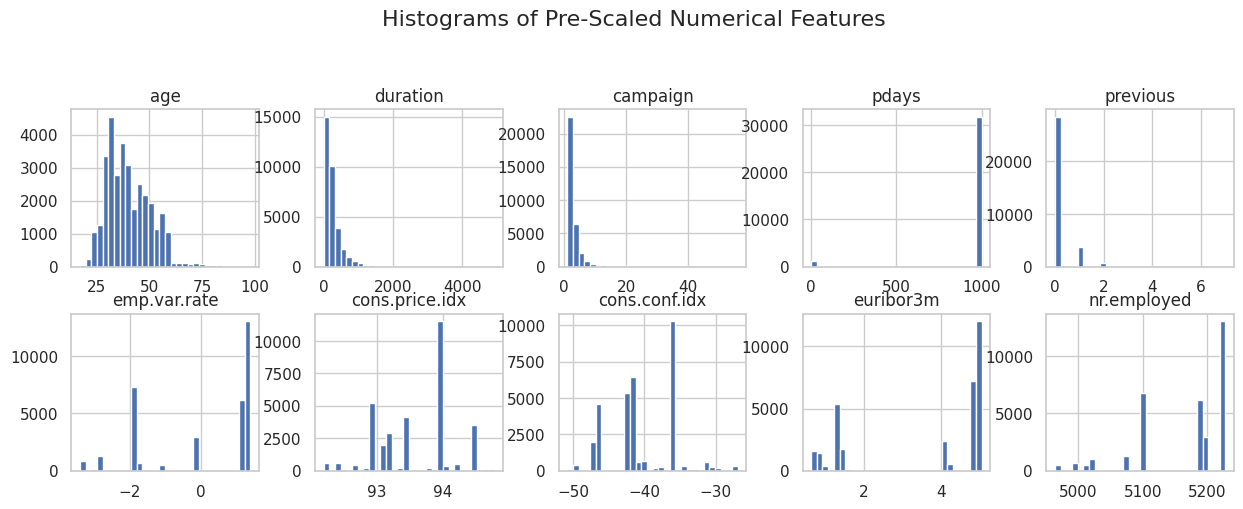

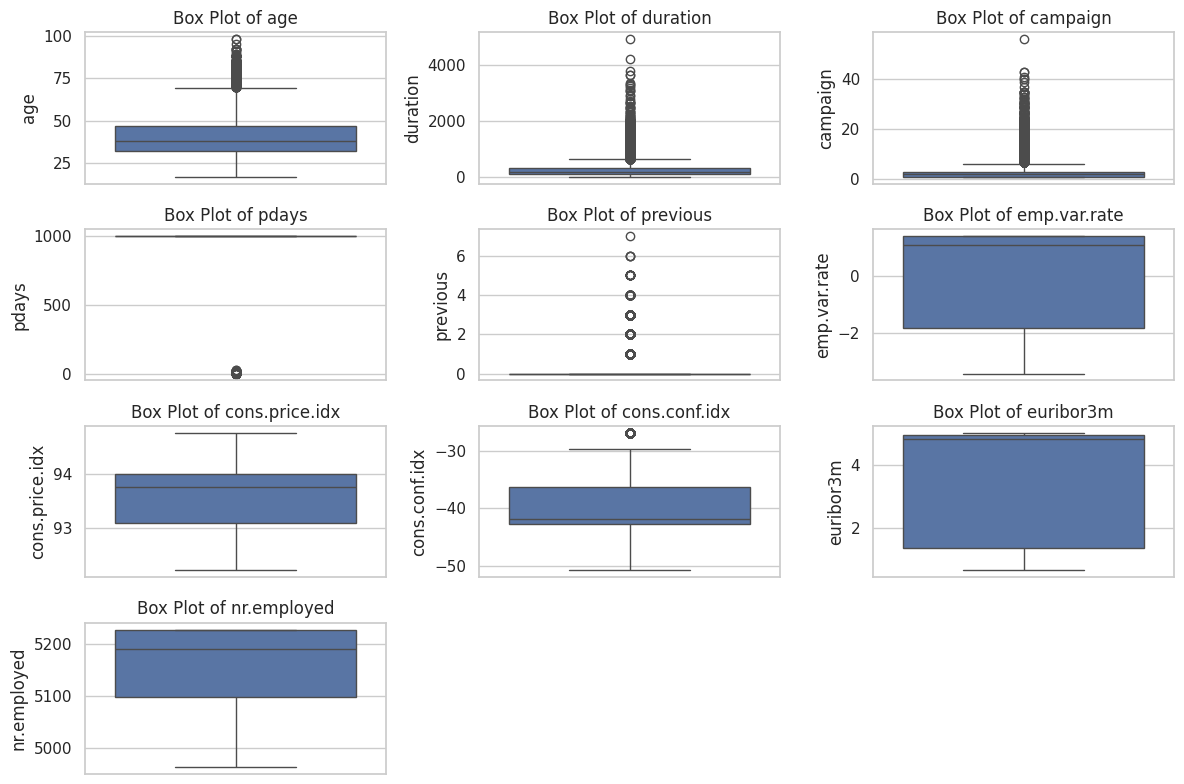

<ipython-input-14-f6aad3fbd28f>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_cols_imputed[column], palette="Set2")
<ipython-input-14-f6aad3fbd28f>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_cols_imputed[column], palette="Set2")
<ipython-input-14-f6aad3fbd28f>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_cols_imputed[column], palette="Set2")
<ipython-input-14-f6aad3fbd28f>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

<Figure size 1200x800 with 0 Axes>

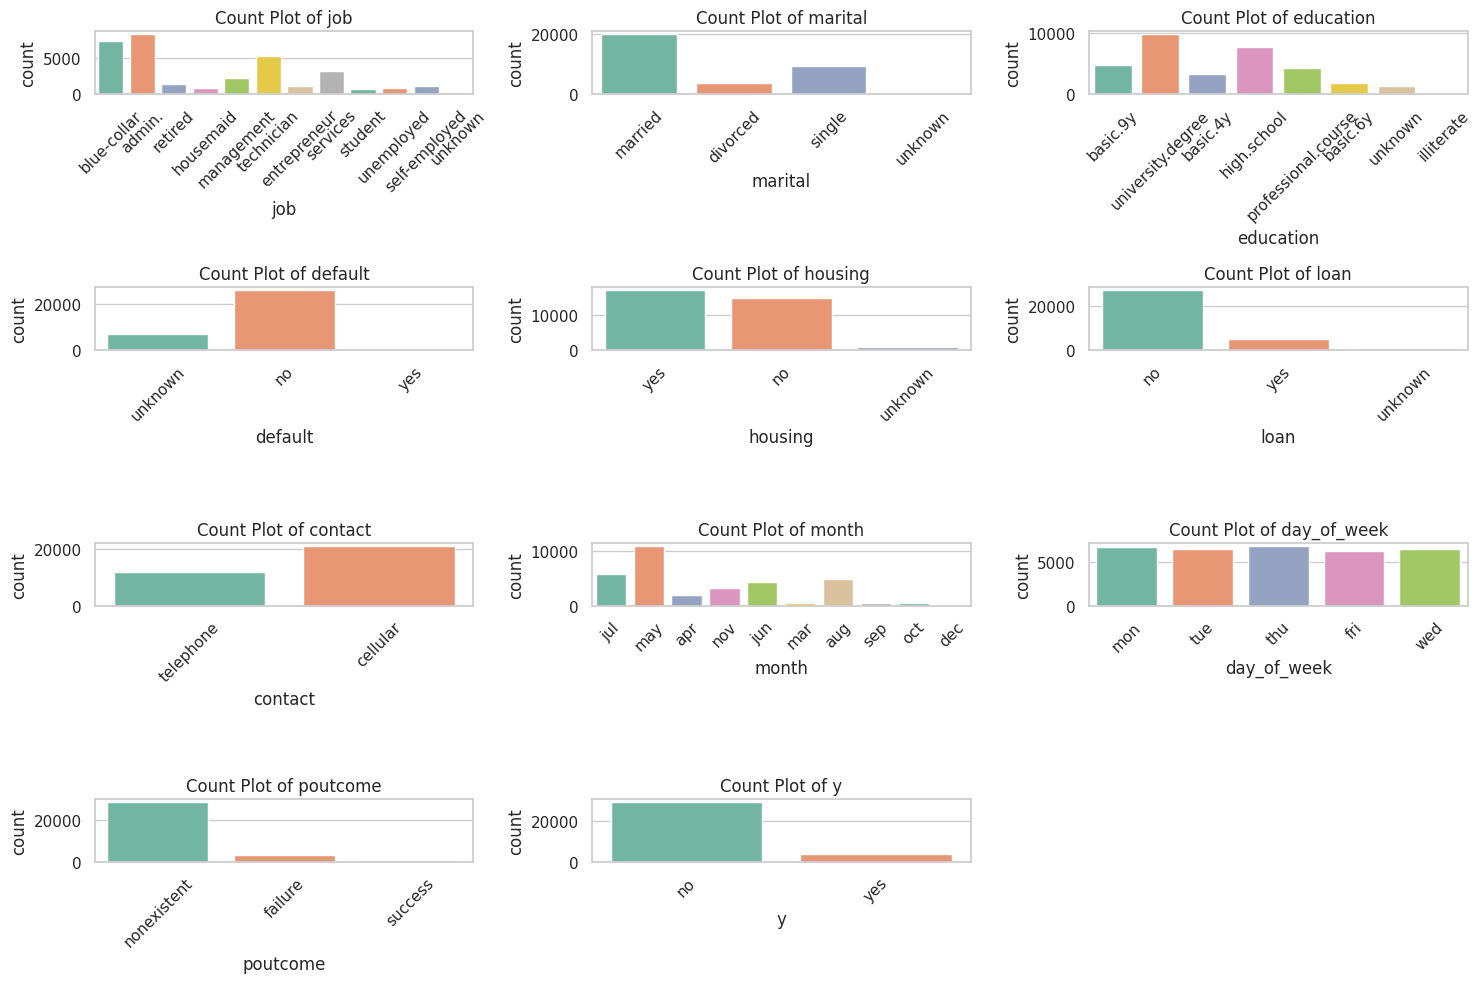

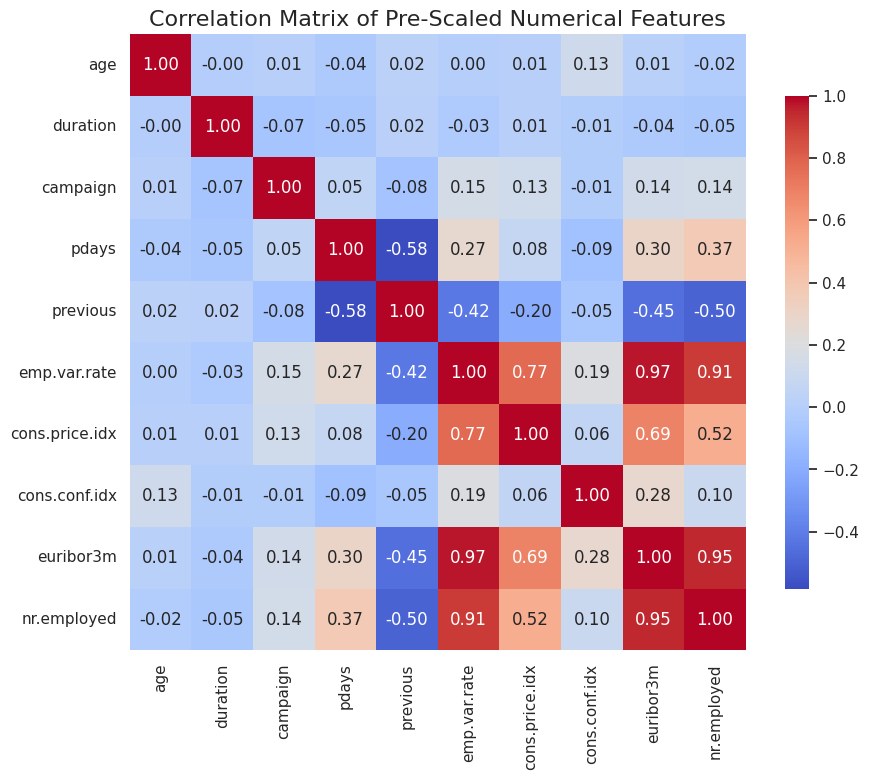

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Set the style for seaborn
sns.set(style='whitegrid')

# ----------------------------- #
# 1. Numerical Data (Pre-Scaled) #
# ----------------------------- #

# a) Histograms for pre-scaled numerical features
plt.figure(figsize=(20, 20))
numerical_cols_imputed.hist(bins=30, figsize=(15, 10), layout=(4, 5))  # Adjust layout based on the number of numerical columns
plt.suptitle('Histograms of Pre-Scaled Numerical Features', fontsize=16)
plt.show()

# b) Box plots for pre-scaled numerical features
num_cols = len(numerical_cols_imputed.columns)  # Get the number of numerical columns
nrows = int(np.ceil(num_cols / 3))  # Calculate number of rows needed, 3 columns per row

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_cols_imputed.columns):
    plt.subplot(nrows, 3, i + 1)  # Create a subplot for each numerical column
    sns.boxplot(data=numerical_cols_imputed[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

# ------------------------ #
# 2. Categorical Data Plots #
# ------------------------ #

# For categorical columns, we will use count plots
plt.figure(figsize=(12, 8))
num_cat_cols = len(categorical_cols_imputed.columns)
nrows_cat = int(np.ceil(num_cat_cols / 3))  # Calculate number of rows needed for 3 columns per row

plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_cols_imputed.columns):
    plt.subplot(nrows_cat, 3, i + 1)
    sns.countplot(x=categorical_cols_imputed[column], palette="Set2")
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# ---------------------------- #
# 3. Correlation Matrix for Numerical #
# ---------------------------- #

plt.figure(figsize=(10, 8))
correlation_matrix_pre_scaled = numerical_cols_imputed.corr()  # Compute the correlation matrix for pre-scaled numerical data
sns.heatmap(correlation_matrix_pre_scaled, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Pre-Scaled Numerical Features', fontsize=16)
plt.show()


Now we show all the data post encoding/scaling. Most importantly, we show the correlation Matrix, which is the one that will allow us to get a feeling for what inferences our model will make based on the corrrelations.

<Figure size 1200x800 with 0 Axes>

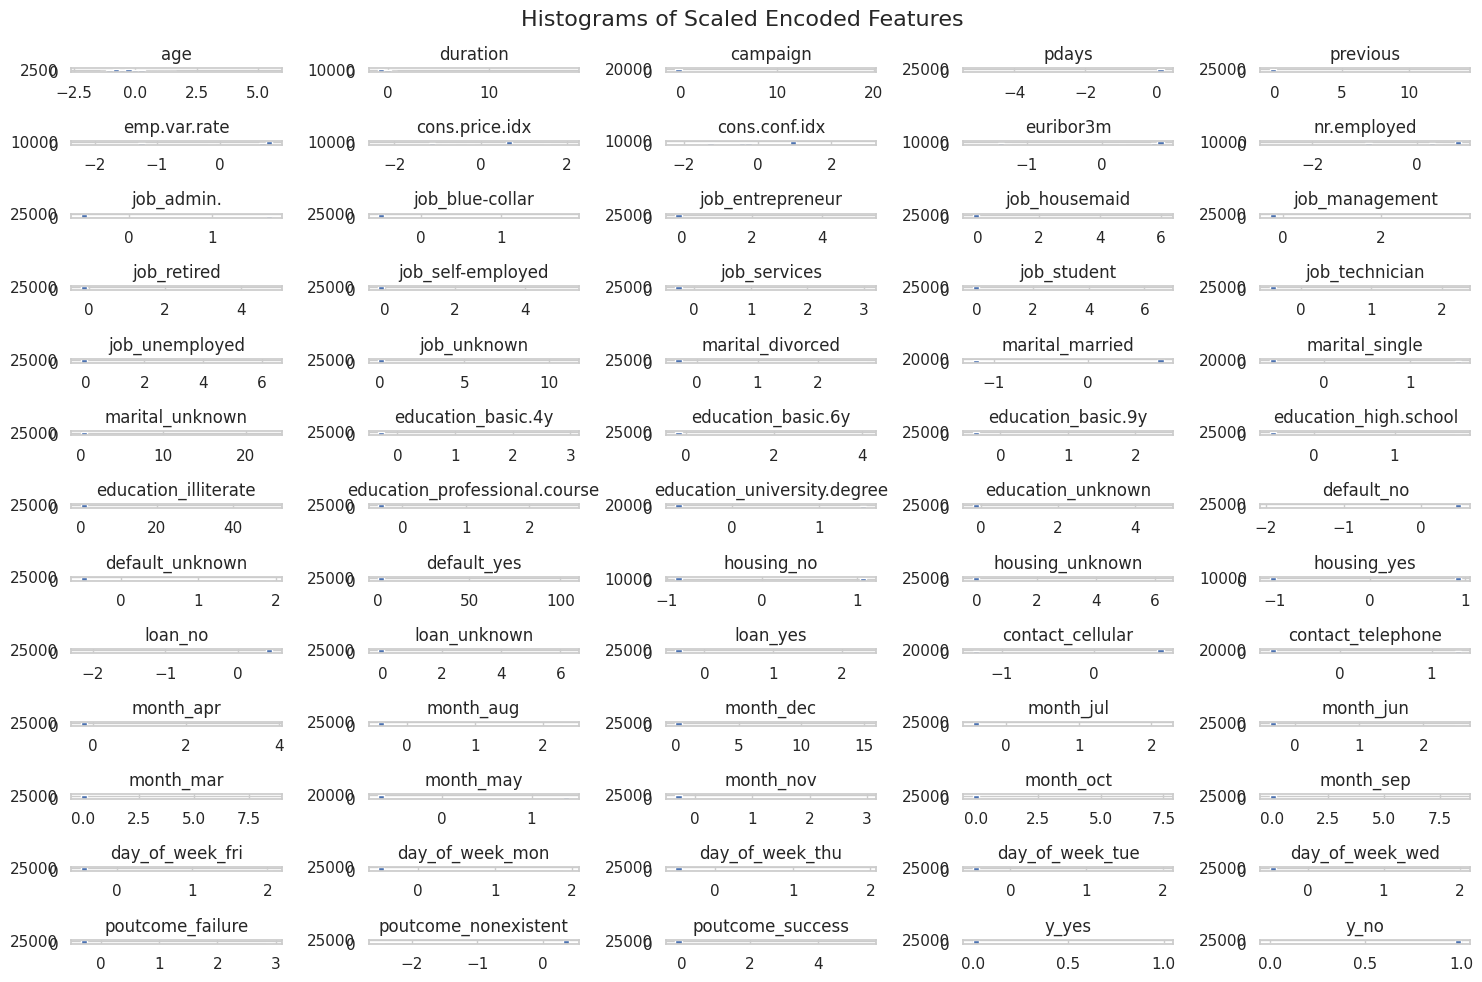

<ipython-input-15-a2493f0155ef>:22: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()  # Ensure no overlapping plots


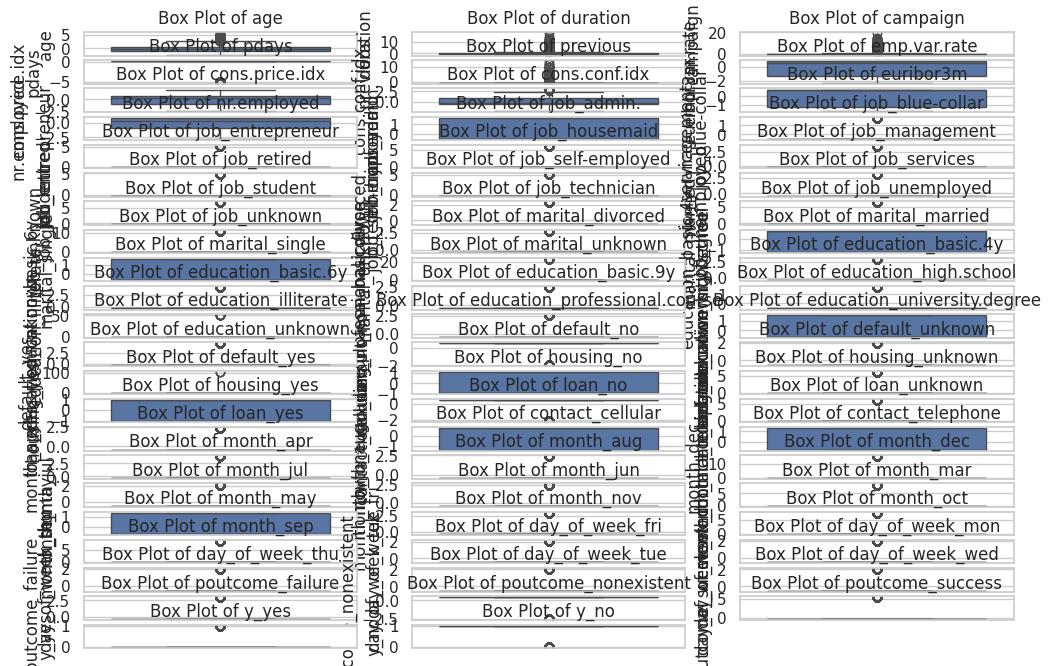

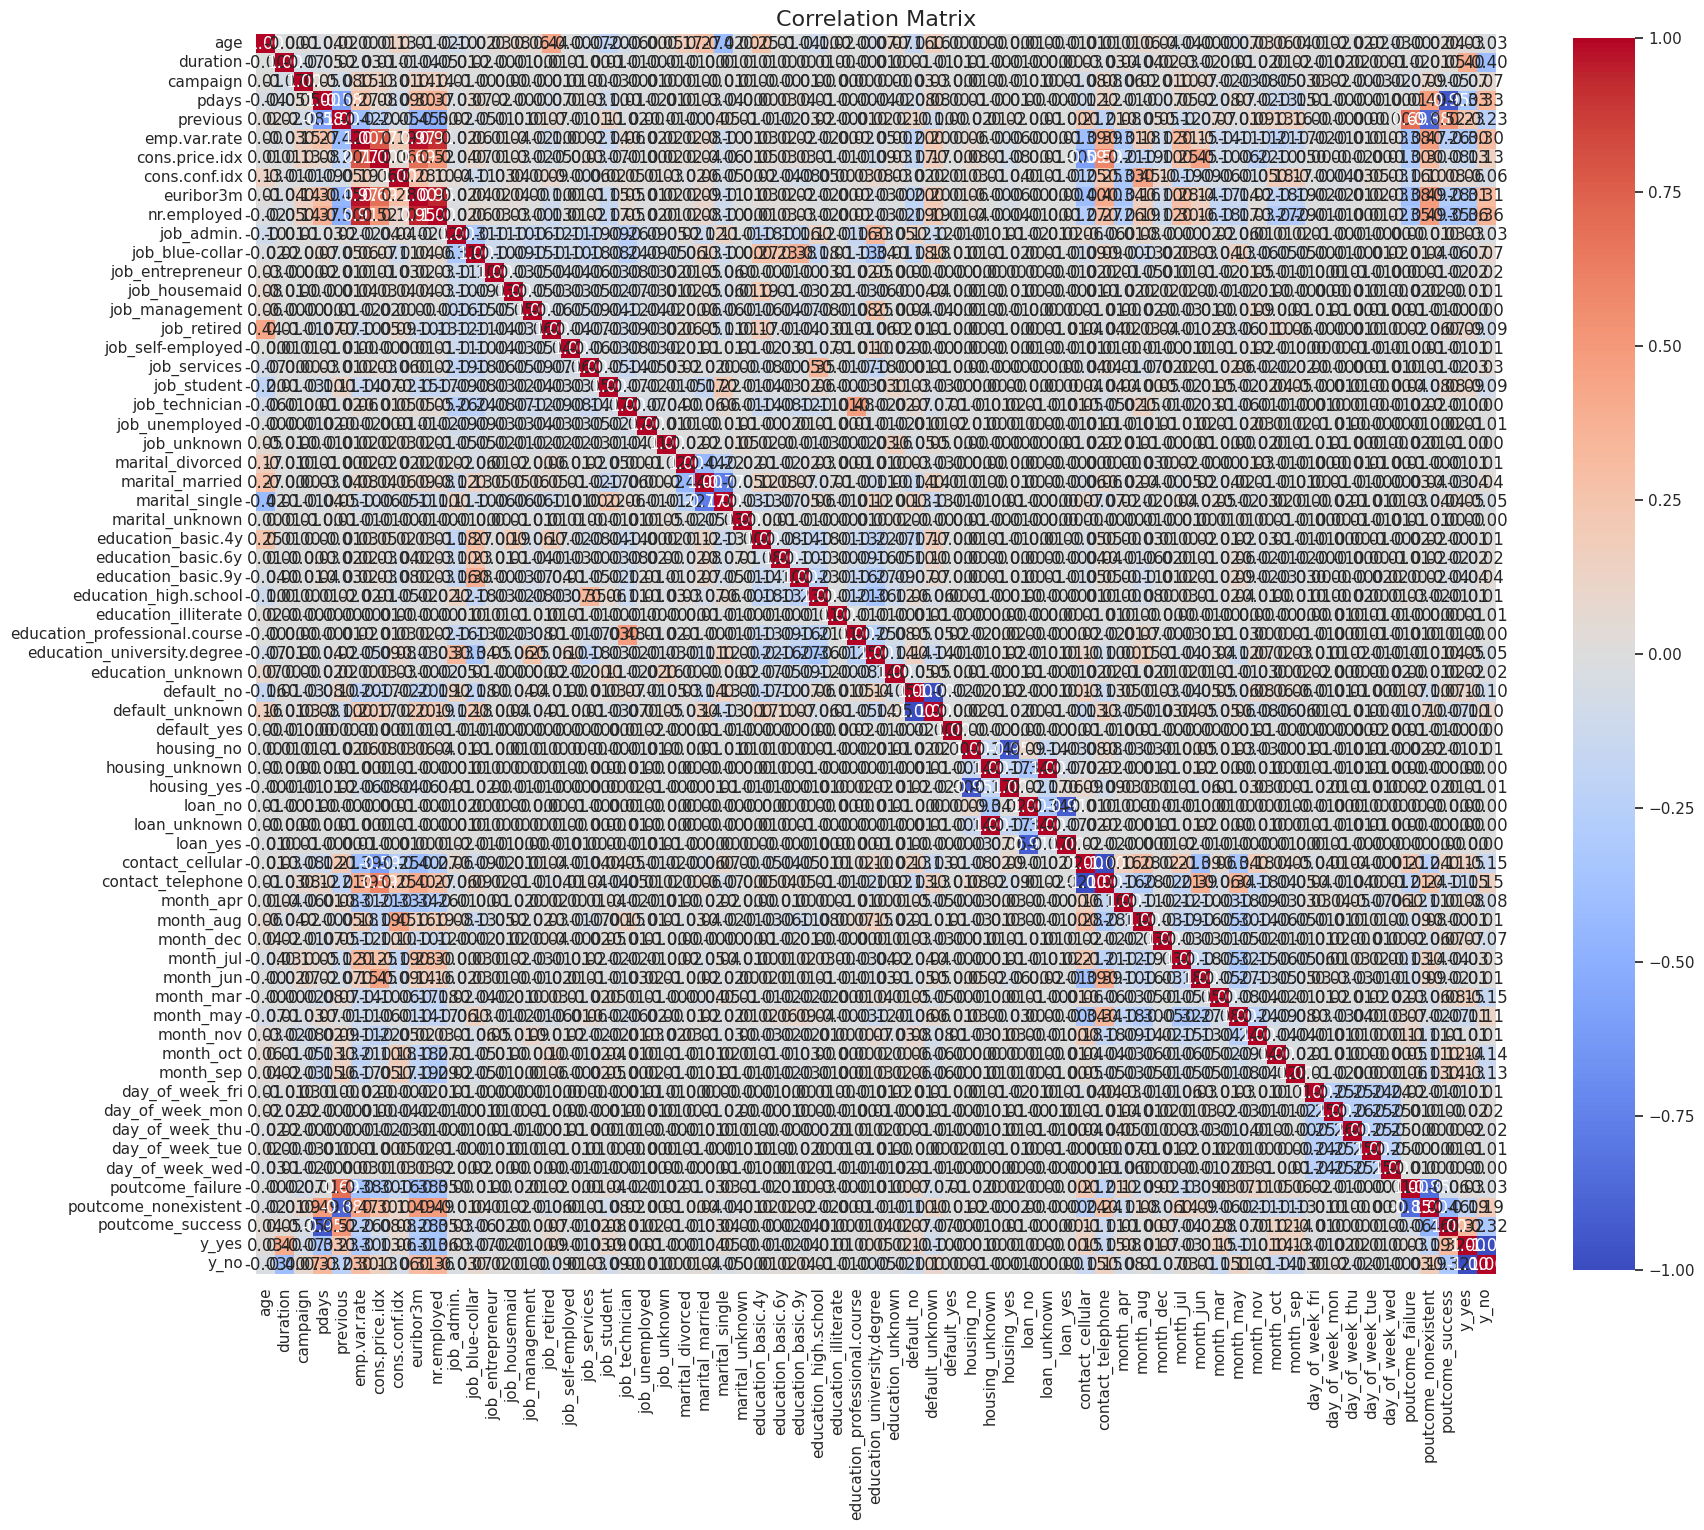

In [ ]:
# Set the style for seaborn
sns.set(style='whitegrid')

# 1. Histograms for numerical features (now all of them are numerical)
num_cols = len(final_train_data_labels.columns)  # Get the number of numerical columns
nrows = int(np.ceil(num_cols / 5))  # Dynamically calculate rows, 5 columns per row

plt.figure(figsize=(12, 8))
final_train_data_labels.hist(bins=30, figsize=(15, 10), layout=(nrows, 5))  # Adjust layout dynamically
plt.suptitle('Histograms of Scaled Encoded Features', fontsize=16)
plt.tight_layout()  # Ensure no overlapping plots
plt.show()

# 2. Box plots for numerical features
nrows_box = int(np.ceil(num_cols / 3))  # Calculate rows for box plots (3 per row)

plt.figure(figsize=(12, 8))
for i, column in enumerate(final_train_data_labels.columns):
    plt.subplot(nrows_box, 3, i + 1)  # Create a subplot for each column
    sns.boxplot(data=final_train_data_labels[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()  # Ensure no overlapping plots
plt.show()

# 3. Correlation Matrix
plt.figure(figsize=(20, 20))
correlation_matrix = final_train_data_labels.corr()  # Compute the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix', fontsize=16)
plt.show()




**Bank.csv:**


Taking a look at this  correlation matrix, we can see some (probably) meaningful correlations between variables we didn't see before (we must note that, even if all the correlations are a bit weak, we are comparing them in a relative way):


Since the most important value here is **y**, since it is the target or outcome of the whole operation with the client, we must focus on the correlations we can observe within it:

* As it is expected, **poutcome** is correlated with **y**, since it literally represents if the outcome of the operation was successful or not. The correlation just doesn't appear to be perfect because there were a lot of **unknown** values that were substituted by the most common value, which happened to be **failure**

* We can also observe that **y** is correlated with **duration** (and hence poutcome also is), which indicates that the longer the calls the more likely the client is to accept the contract. **This is probably the most important insight to note.**

* Then, we can observe that **poutcome** is correlated with **pdays** and **previous**, but **y** not so much. This indicates (since in poutcome there's a lot more failures then successes than there should be) that, the number of contacts and the time that passes between different contacts is **not very correlated with the final success**, but **the lower they are the more likely the contract will fail** (a good analogy could be how clean a workplace is: a super clean workplace doesn't improve the worker's wellbeing much more than a clean enough workplace, but the lack of cleaniness would dramatically affect that wellbeing negatively).
* Finally, **pdays** and **previous** are positively correlated as well, which makes sense because the more responsive a client is the more sense it makes to call them back.

Other correlations we can observe (bonus!):

* Housing and month appear to be slightly correlated (this one is probably just a coincidence)
* Job and education are also slightly positively correlated
* Age and marital appear to be negatively correlated, which in this case could mean that (just an example guess based on the fact that values closer to 0 are married, positive values are single and negative are divorced if we look at the histograms) the older the people, the less likely they are to be divorced (?)

**Bank-additional-full.csv:**

All the previous analysis from bank.csv holds, but now it gets complimented by the extra data given by bank-additional-full.csv, We can observe some new things:

* There are HUGE correlations between the number of **employees**, **euribor** 3 month rate and **employment variation rate**, which makes sense because all of those have to do with internal company values and employment.
* The biggest correlation happens between number of employees and euribor
* Consumer price index is also correlated with employment variation rate, which is also correlated with euribor. So it all goes full circle with the company being able to increase the price when they have more euribor indicator, more employment variation rate and more employees.
* However, all of those appear to be inversely correlated with the previous date of contact with the client, which makes sense because more employees means more possible and frequent calls.
* Same thing happens with contact, which again makes sense for the aforementioned reasons

**Now we represent the correlation matrix of the REAL training data, which will look more confusing but yiels maybe even more results**

In [ ]:
plt.figure(figsize=(20, 20))
correlation_matrix = final_train_data.corr()  # Compute the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True,
            cbar_kws={"shrink": .8}, annot_kws={"size": 6})  # Adjust 'size' to control the font size
plt.title('Correlation Matrix', fontsize=16)
plt.show()


NameError: name 'final_train_data' is not defined

<Figure size 2000x2000 with 0 Axes>

**bank.csv**

By looking at this final correlation matrix, we can confirm all the conclusions we drew from taking a look at the other correlation matrix:
* **pdays** appears now even more strongly correlated with the **failure of poutcome** (and hence it should also be correlated with y, even if we don't see that), but not so much with the success
* **y appears correlated to duration in the same fashion as we described**
* Having tertiary education correlates with a management position
* The different states of **marital** are correlated with age, with being single having a negative correlation and being married a positive one (the older you are the more likely you are married).


Some other new things to note:
* Obviously, age is correlated with being retired
* It seems like there are more housing loans being approved or denied in may and august
* There's obviously a lot of correlation between different values of the same categorical column, specially if they are binary :D

**bank.additional-full.csv:**

This correlatin matrix, as confusing as it looks, confirms everything stated in the comments for the previous correlation matrix. It just appears to give more resolution

# **Step 2: Training Three Classification Models** (1.5 grade units)


**Model Selection:** Choose three classification algorithms: K-Nearest Neighbors (KNN), Logistic Regression, and Decision Tree. (0.5 grade units)

**Model Training:** ** Train each of the selected models on the training dataset. (0.5 grade units)

**Model Evaluation:** Evaluate the performance of each model on the testing dataset using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC). (0.5 grade units)

In [ ]:
# Check if 'y_yes' is a column in the final_train_data
if 'y_yes' in final_train_data_labels.columns:
    # Extract 'y_yes' from final_train_data
    y_yes = final_train_data_labels['y_yes']

    # Check the distribution of 'y_yes'
    print("Distribution of y_yes values:")
    print(y_yes.value_counts())

    # Check the data type of 'y_yes'
    print("Data type of y_yes:")
    print(y_yes.dtype)
else:
    print("'y_yes' is not found in the dataset.")


Distribution of y_yes values:
y_yes
0.0    29245
1.0     3705
Name: count, dtype: int64
Data type of y_yes:
float64


In [ ]:
# Step 2: Training Three Classification Models

# Importing necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Assuming 'final_train_data' contains the features and 'y_yes' is the target variable
X = final_train_data_labels.drop(columns=['y_yes'])  # Features
y = final_train_data_labels['y_yes']  # Target

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization
knn = KNeighborsClassifier()
log_reg = LogisticRegression(C=0.01, max_iter=1000)  # Ensure convergence with more iterations, the parameter C controls the amount of regularization applied to the model, helping to prevent overfitting


print("Models Initialized: KNN, Logistic Regression")


Models Initialized: KNN, Logistic Regression


In [ ]:
# To make sure our decision tree model is optimal, we search for the optimal parameters to prevent overfitting
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize a Decision Tree
dtree = DecisionTreeClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_dtree = grid_search.best_estimator_

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
#Now we know that, out of the limited pool of values, Best Parameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
dtree = DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, random_state=42)

In [ ]:
# Initialize and train the models

# Training the models on the training dataset
knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
dtree.fit(X_train, y_train)

print("All models have been trained.")


All models have been trained.


In [ ]:
# Importing necessary evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # For binary classification
    return accuracy, precision, recall, f1, roc_auc

# Evaluating KNN
knn_eval = evaluate_model(knn, X_test, y_test)
print(f"KNN - Accuracy: {knn_eval[0]:.4f}, Precision: {knn_eval[1]:.4f}, Recall: {knn_eval[2]:.4f}, F1-score: {knn_eval[3]:.4f}, ROC-AUC: {knn_eval[4]:.4f}")

# Evaluating Logistic Regression
log_reg_eval = evaluate_model(log_reg, X_test, y_test)
print(f"Logistic Regression - Accuracy: {log_reg_eval[0]:.4f}, Precision: {log_reg_eval[1]:.4f}, Recall: {log_reg_eval[2]:.4f}, F1-score: {log_reg_eval[3]:.4f}, ROC-AUC: {log_reg_eval[4]:.4f}")

# Evaluating Decision Tree
dtree_eval = evaluate_model(dtree, X_test, y_test)
print(f"Decision Tree - Accuracy: {dtree_eval[0]:.4f}, Precision: {dtree_eval[1]:.4f}, Recall: {dtree_eval[2]:.4f}, F1-score: {dtree_eval[3]:.4f}, ROC-AUC: {dtree_eval[4]:.4f}")


KNN - Accuracy: 0.9053, Precision: 0.6553, Recall: 0.3356, F1-score: 0.4439, ROC-AUC: 0.8309
Logistic Regression - Accuracy: 0.9973, Precision: 0.9879, Recall: 0.9879, F1-score: 0.9879, ROC-AUC: 0.9997
Decision Tree - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000, ROC-AUC: 1.0000


In [ ]:
# Evaluate model on training set
def evaluate_model_on_train(model, X_train, y_train):
    y_train_pred = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    return accuracy_train, precision_train, recall_train, f1_train, roc_auc_train

# Check performance on the training data
print("Evaluating models on the training set:\n")

# KNN on training set
knn_train_eval = evaluate_model_on_train(knn, X_train, y_train)
print(f"KNN on Training - Accuracy: {knn_train_eval[0]:.4f}, Precision: {knn_train_eval[1]:.4f}, Recall: {knn_train_eval[2]:.4f}, F1-score: {knn_train_eval[3]:.4f}, ROC-AUC: {knn_train_eval[4]:.4f}")

# Logistic Regression on training set
log_reg_train_eval = evaluate_model_on_train(log_reg, X_train, y_train)
print(f"Logistic Regression on Training - Accuracy: {log_reg_train_eval[0]:.4f}, Precision: {log_reg_train_eval[1]:.4f}, Recall: {log_reg_train_eval[2]:.4f}, F1-score: {log_reg_train_eval[3]:.4f}, ROC-AUC: {log_reg_train_eval[4]:.4f}")

# Decision Tree on training set
dtree_train_eval = evaluate_model_on_train(dtree, X_train, y_train)
print(f"Decision Tree on Training - Accuracy: {dtree_train_eval[0]:.4f}, Precision: {dtree_train_eval[1]:.4f}, Recall: {dtree_train_eval[2]:.4f}, F1-score: {dtree_train_eval[3]:.4f}, ROC-AUC: {dtree_train_eval[4]:.4f}")


Evaluating models on the training set:

KNN on Training - Accuracy: 0.9255, Precision: 0.7939, Recall: 0.4549, F1-score: 0.5784, ROC-AUC: 0.9632
Logistic Regression on Training - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000, ROC-AUC: 1.0000
Decision Tree on Training - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000, ROC-AUC: 1.0000


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
knn_cv = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
log_reg_cv = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
dtree_cv = cross_val_score(dtree, X, y, cv=5, scoring='accuracy')

print(f"KNN Cross-Validation Accuracy: {knn_cv.mean():.4f}")
print(f"Logistic Regression Cross-Validation Accuracy: {log_reg_cv.mean():.4f}")
print(f"Decision Tree Cross-Validation Accuracy: {dtree_cv.mean():.4f}")


KNN Cross-Validation Accuracy: 0.9030
Logistic Regression Cross-Validation Accuracy: 1.0000
Decision Tree Cross-Validation Accuracy: 1.0000


In [ ]:
# Apply regularization to Logistic Regression
log_reg_regularized = LogisticRegression(C=0.01, max_iter=1000)
log_reg_regularized.fit(X_train, y_train)

# Limit the depth of Decision Tree to prevent overfitting
dtree_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree_pruned.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
knn_cv = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
log_reg_cv = cross_val_score(log_reg_regularized, X, y, cv=5, scoring='accuracy')
dtree_cv = cross_val_score(dtree_pruned, X, y, cv=5, scoring='accuracy')

print(f"KNN Cross-Validation Accuracy: {knn_cv.mean():.4f}")
print(f"Logistic Regression Cross-Validation Accuracy: {log_reg_cv.mean():.4f}")
print(f"Decision Tree Cross-Validation Accuracy: {dtree_cv.mean():.4f}")

KNN Cross-Validation Accuracy: 0.9030
Logistic Regression Cross-Validation Accuracy: 0.9983
Decision Tree Cross-Validation Accuracy: 1.0000


In [ ]:
#grade += 2